In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isdir, join

In [21]:
env = "Hopper-v3"
cdir = f"logs/{env}/"


In [30]:
tqc_rewards, n_tqc = np.zeros((100, 10)), 0
sac_rewards, n_sac = np.zeros((100, 10)), 0

for d in listdir(cdir):
    path = join(cdir, d)
    if not isdir(path):
        continue

    elif "TQC" in d:
        with np.load(path + "/evaluations.npz") as data:
            tqc_rewards += data["results"]
            timesteps = data["timesteps"]
        n_tqc += 1

    if "SAC" in d:
        with np.load(path + "/evaluations.npz") as data:
            sac_rewards += data["results"]
        n_sac += 1
        
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size


tqc_rewards /= n_tqc
tqc_mean = tqc_rewards.mean(axis=1)
tqc_convolved = np.convolve(tqc_mean, kernel, mode="same")
tqc_std = tqc_rewards.std(axis=1)

sac_rewards /= n_sac
sac_mean = sac_rewards.mean(axis=1)
sac_convolved = np.convolve(sac_mean, kernel, mode="same")
sac_std = sac_rewards.std(axis=1)


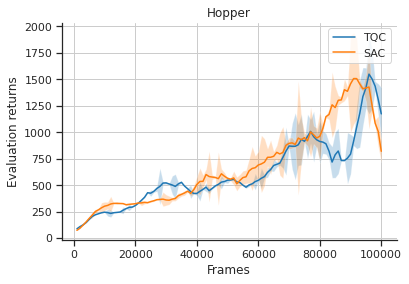

In [31]:
custom_params = {
    "axes.grid": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(style="ticks", palette="tab10", rc=custom_params)

fig, ax = plt.subplots()

ax.plot(timesteps, tqc_convolved, label="TQC")
ax.fill_between(timesteps, tqc_convolved + tqc_std, tqc_convolved - tqc_std, alpha=0.25)

ax.plot(timesteps, sac_convolved, label="SAC")
ax.fill_between(timesteps, sac_convolved + sac_std, sac_convolved - sac_std, alpha=0.25)

ax.set_title(env[:-3])
ax.set_xlabel("Frames")
ax.set_ylabel("Evaluation returns")
ax.legend()

fig.show()
fig.savefig(
    f"plots/{env[:-3].lower()}_tqc_sac_smoothed.png", facecolor="white", transparent=False
)


In [25]:
with np.load("logs/Hopper-v3/TQC_1/evaluations.npz") as data:
    tqc_rewards = data["results"]
    timesteps = data["timesteps"]

In [26]:
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size

tqc_mean = tqc_rewards.mean(axis=1)
tqc_convolved = np.convolve(tqc_mean, kernel, mode="same")
tqc_std = tqc_rewards.std(axis=1)

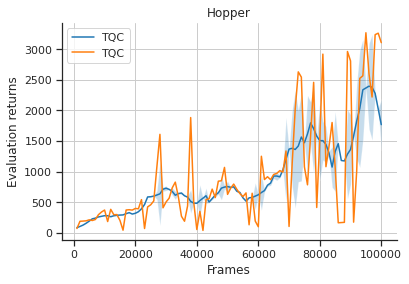

In [27]:
custom_params = {
    "axes.grid": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(style="ticks", palette="tab10", rc=custom_params)

fig, ax = plt.subplots()

ax.plot(timesteps, tqc_convolved, label="TQC")
ax.fill_between(timesteps, tqc_convolved + tqc_std, tqc_convolved - tqc_std, alpha=0.25)

ax.plot(timesteps, tqc_mean, label="TQC")

ax.set_title(env[:-3])
ax.set_xlabel("Frames")
ax.set_ylabel("Evaluation returns")
ax.legend()

fig.show()
